In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys 
import os 

In [11]:
results_93_to_18=pd.read_csv('../liverpoolfcstats.csv')
results_18_to_21=pd.read_csv('../liverpoolfcstats2018onwards.csv')

results_18_to_21.head()

# Combine the two datasets  
results = results_93_to_18.append(results_18_to_21)
print(results.describe())
print(results.shape)


        Unnamed: 0        FTHG         FTAG        HTHG        HTAG
count   958.000000  1038.00000  1038.000000  874.000000  874.000000
mean   4872.102296     1.60501     1.133911    0.715103    0.477117
std    2772.275110     1.33279     1.174457    0.856256    0.708355
min       4.000000     0.00000     0.000000    0.000000    0.000000
25%    2485.750000     1.00000     0.000000    0.000000    0.000000
50%    4885.500000     1.00000     1.000000    0.000000    0.000000
75%    7274.750000     2.00000     2.000000    1.000000    1.000000
max    9658.000000     7.00000     6.000000    5.000000    4.000000
(1039, 11)


In [3]:
# Count number of times we've played teams at home
home_team = results['HomeTeam'].str.split('|').value_counts()
print(home_team)

[Liverpool]           519
[Chelsea]              28
[Everton]              28
[Man United]           27
[Arsenal]              27
[Tottenham]            25
[Newcastle]            25
[Aston Villa]          25
[West Ham]             24
[Man City]             22
[Southampton]          20
[Blackburn]            17
[Sunderland]           16
[Leicester]            14
[Fulham]               14
[Middlesbrough]        13
[Bolton]               13
[West Brom]            12
[Leeds]                11
[Stoke]                10
[Crystal Palace]       10
[Charlton]              8
[Norwich]               8
[Wigan]                 8
[Coventry]              8
[Sheffield Weds]        7
[Wimbledon]             7
[Derby]                 7
[Swansea]               7
[Watford]               7
[Birmingham]            7
[Portsmouth]            7
[Burnley]               6
[QPR]                   6
[Wolves]                6
[Bournemouth]           5
[Hull]                  5
[Nott'm Forest]         4
[Ipswich]   

In [4]:
# Liverpool's total home game stats
total_home_goals = results[results["HomeTeam"] == "Liverpool"]["FTHG"].sum()
total_home_goals_conc= results[results["HomeTeam"] == "Liverpool"]["FTAG"].sum()
total_home_games = results.groupby("HomeTeam")["HomeTeam"].count()

print("Total home goals scored: {}".format(total_home_goals))
print("Total home goals conceded: {}".format(total_home_goals_conc))
print("Total Home Games: {}".format(total_home_games)) #519



Total home goals scored: 1044.0
Total home goals conceded: 415.0
Total Home Games: HomeTeam
Arsenal              27
Aston Villa          25
Barnsley              1
Birmingham            7
Blackburn            17
Blackpool             1
Bolton               13
Bournemouth           5
Bradford              2
Brighton              3
Burnley               6
Cardiff               2
Charlton              8
Chelsea              28
Coventry              8
Crystal Palace       10
Derby                 7
Everton              28
Fulham               14
Huddersfield          2
Hull                  5
Ipswich               4
Leeds                11
Leicester            14
Liverpool           519
Man City             22
Man United           27
Middlesboro           1
Middlesbrough        13
Newcastle            25
Norwich               8
Nott'm Forest         4
Oldham                1
Portsmouth            7
QPR                   6
Reading               3
Sheffield United      3
Sheffield Weds      

In [5]:

# Liverpool's total away game stats
total_away_goals=results[results["AwayTeam"] == "Liverpool"]["FTAG"].sum()
total_away_goals_conc= results[results["AwayTeam"] == "Liverpool"]["FTHG"].sum()
total_away_games = results.groupby("AwayTeam")["AwayTeam"].count()

print("Total away goals scored: {}".format(total_away_goals))
print("Total away goals conceded: {}".format(total_away_goals_conc))
print("Total Away Games: {}".format(total_away_games)) #518




Total away goals scored: 762.0
Total away goals conceded: 622.0
Total Away Games: AwayTeam
Arsenal              28
Aston Villa          24
Barnsley              1
Birmingham            7
Blackburn            17
Blackpool             1
Bolton               13
Bournemouth           5
Bradford              2
Brighton              3
Burnley               6
Cardiff               2
Charlton              8
Chelsea              27
Coventry              8
Crystal Palace       10
Derby                 7
Everton              27
Fulham               14
Huddersfield          2
Hull                  5
Ipswich               4
Leeds                12
Leicester            14
Liverpool           520
Man City             22
Man United           27
Middlesboro           1
Middlesbrough        13
Newcastle            25
Norwich               8
Nott'm Forest         4
Oldham                1
Portsmouth            7
QPR                   6
Reading               3
Sheffield United      3
Sheffield Weds       

In [6]:
# For season 2019-2020, total home goals scored by Liverpool
home_19_20 = results[(results["HomeTeam"]=="Liverpool") & (results["Season"]=="2019-20")]["FTHG"].sum()
print(home_19_20)

52.0


In [7]:
# For season 2019-2020, total away goals scored by Liverpool
away_19_20 = results[(results["AwayTeam"]=="Liverpool") & (results["Season"]=="2019-20")]["FTAG"].sum()
print(away_19_20)

33.0


In [8]:
home_goals = results[results["HomeTeam"]=="Liverpool"]
year = home_goals.groupby("Season").sum()
year.index
year
# plt.plot(year.index, home_goals['FTHG'])
# plt.show()

,Unnamed: 0,FTHG,FTAG,HTHG,HTAG
Season,,,,,
1993-94,4676.0,33.0,23.0,0.0,0.0
1994-95,14688.0,38.0,13.0,0.0,0.0
1995-96,21101.0,46.0,13.0,20.0,5.0
1996-97,28202.0,38.0,19.0,20.0,5.0
1997-98,35668.0,42.0,16.0,14.0,5.0
1998-99,42989.0,44.0,24.0,20.0,12.0
1999-00,50000.0,28.0,13.0,11.0,8.0
2000-01,57334.0,40.0,14.0,17.0,9.0
2001-02,64698.0,33.0,14.0,15.0,5.0


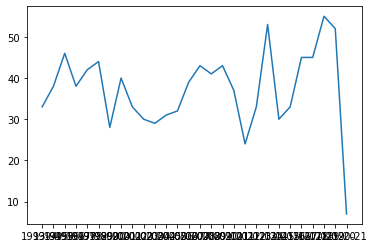

In [9]:
plt.plot(year.index, year['FTHG'])
plt.show()

In [13]:
#Mean number of goals scored against Everton at Goodison Park
ev_home_goals = results[results["HomeTeam"]=="Everton"]
ev_home_goals



,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
7,80.0,18/09/1993,Everton,Liverpool,2.0,0.0,H,NaN,NaN,NaN,1993-94
56,625.0,21/11/1994,Everton,Liverpool,2.0,0.0,H,NaN,NaN,NaN,1994-95
118,1275.0,16/04/1996,Everton,Liverpool,1.0,1.0,D,1.0,0.0,H,1995-96
155,1638.0,16/04/1997,Everton,Liverpool,1.0,1.0,D,0.0,1.0,A,1996-97
169,1785.0,18/10/1997,Everton,Liverpool,2.0,0.0,H,1.0,0.0,H,1997-98
206,2146.0,17/10/1998,Everton,Liverpool,0.0,0.0,D,0.0,0.0,D,1998-99
269,2778.0,21/04/2000,Everton,Liverpool,0.0,0.0,D,0.0,0.0,D,1999-00
305,3154.0,16/04/2001,Everton,Liverpool,2.0,3.0,A,1.0,1.0,D,2000-01
315,3243.0,15/09/2001,Everton,Liverpool,1.0,3.0,A,1.0,2.0,A,2001-02
383,3919.0,19/04/2003,Everton,Liverpool,1.0,2.0,A,0.0,1.0,A,2002-03


In [21]:
ev_year = ev_home_goals.groupby("Season").sum()
print(ev_year.mean())
ev_year.index

Unnamed: 0    4350.964286
FTHG             0.928571
FTAG             1.107143
HTHG             0.464286
HTAG             0.500000
dtype: float64


Index(['1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21'],
      dtype='object', name='Season')

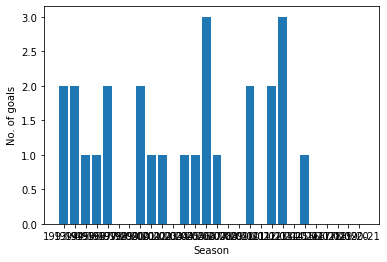

In [19]:
plt.bar(ev_year.index, ev_year['FTHG'])
plt.xlabel("Season")
plt.ylabel("No. of goals")
plt.show()